# 1. Business Problem. Predict Turnover

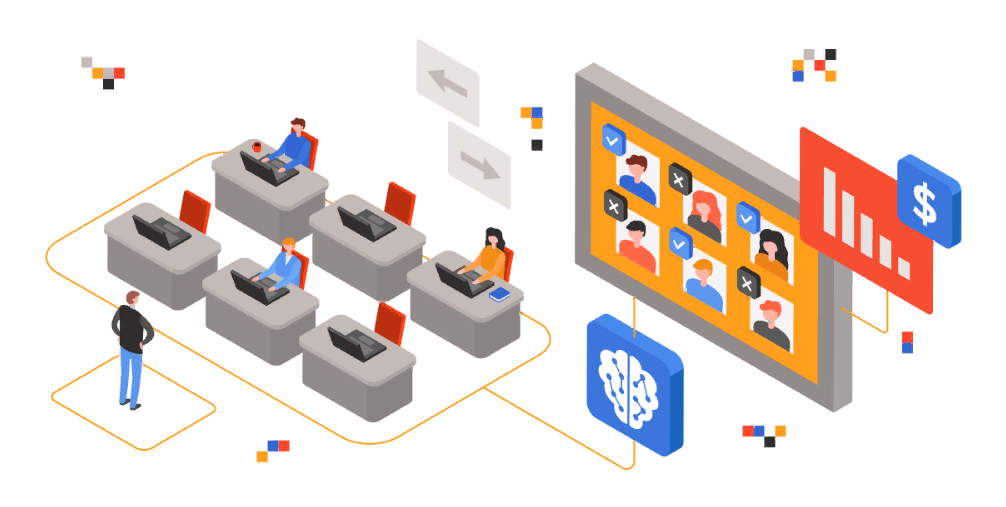

## Проблема

Истощение-это проблема, которая затрагивает все предприятия, независимо от географии, отрасли и размера компании. Истощение персонала приводит к значительным затратам для бизнеса, включая затраты на остановку бизнеса, наем новых сотрудников и обучение новых сотрудников. Таким образом, существует большой деловой интерес к пониманию движущих сил и минимизации истощения персонала.

В этом контексте использование классификационных моделей для прогнозирования вероятности увольнения сотрудника может значительно повысить способность HR вовремя вмешаться и исправить ситуацию, чтобы предотвратить истощение. Хотя эту модель можно регулярно запускать для выявления сотрудников, которые с наибольшей вероятностью уволятся, ключевым фактором успеха будет человеческий фактор, заключающийся в том, чтобы связаться с сотрудником, понять текущую ситуацию сотрудника и принять меры для устранения контролируемых факторов, которые могут предотвратить истощение сотрудника.

## Данные

Этот набор данных представляет собой опрос сотрудников IBM, показывающий, есть ли истощение или нет. Набор данных содержит около 1500 записей. Учитывая ограниченный размер набора данных, следует ожидать, что модель обеспечит лишь незначительное улучшение идентификации истощения по сравнению со случайным распределением вероятности истощения.

Набор данных содержит такие данные, как возраст, пол, удовлетворенность работой, удовлетворенность окружающей средой, сфера образования, роль работы, доход, сверхурочная работа, процент повышения заработной платы, срок пребывания в должности, время обучения, годы в текущей роли, статус отношений и многое другое.

## Первичный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Human_resource_data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()
print('Пропусков:')
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


* В нашем наборе 1470 строк 35 столбцов, пропусков нет
* Средний возраст работников компании 37 лет
* Значение столбцов содержащиx "Yes"/"No" заменим на 1/0 это улучшит визуализацию 

In [5]:
data['Attrition'] = data['Attrition'].apply(lambda x:1 if x=='Yes' else 0)
data['Over18'] = data['Over18'].apply(lambda x:1 if x=='Y' else 0)
data['OverTime'] = data['OverTime'].apply(lambda x:1 if x=='Yes' else 0)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc71bf50f10>,
      dtype=object)

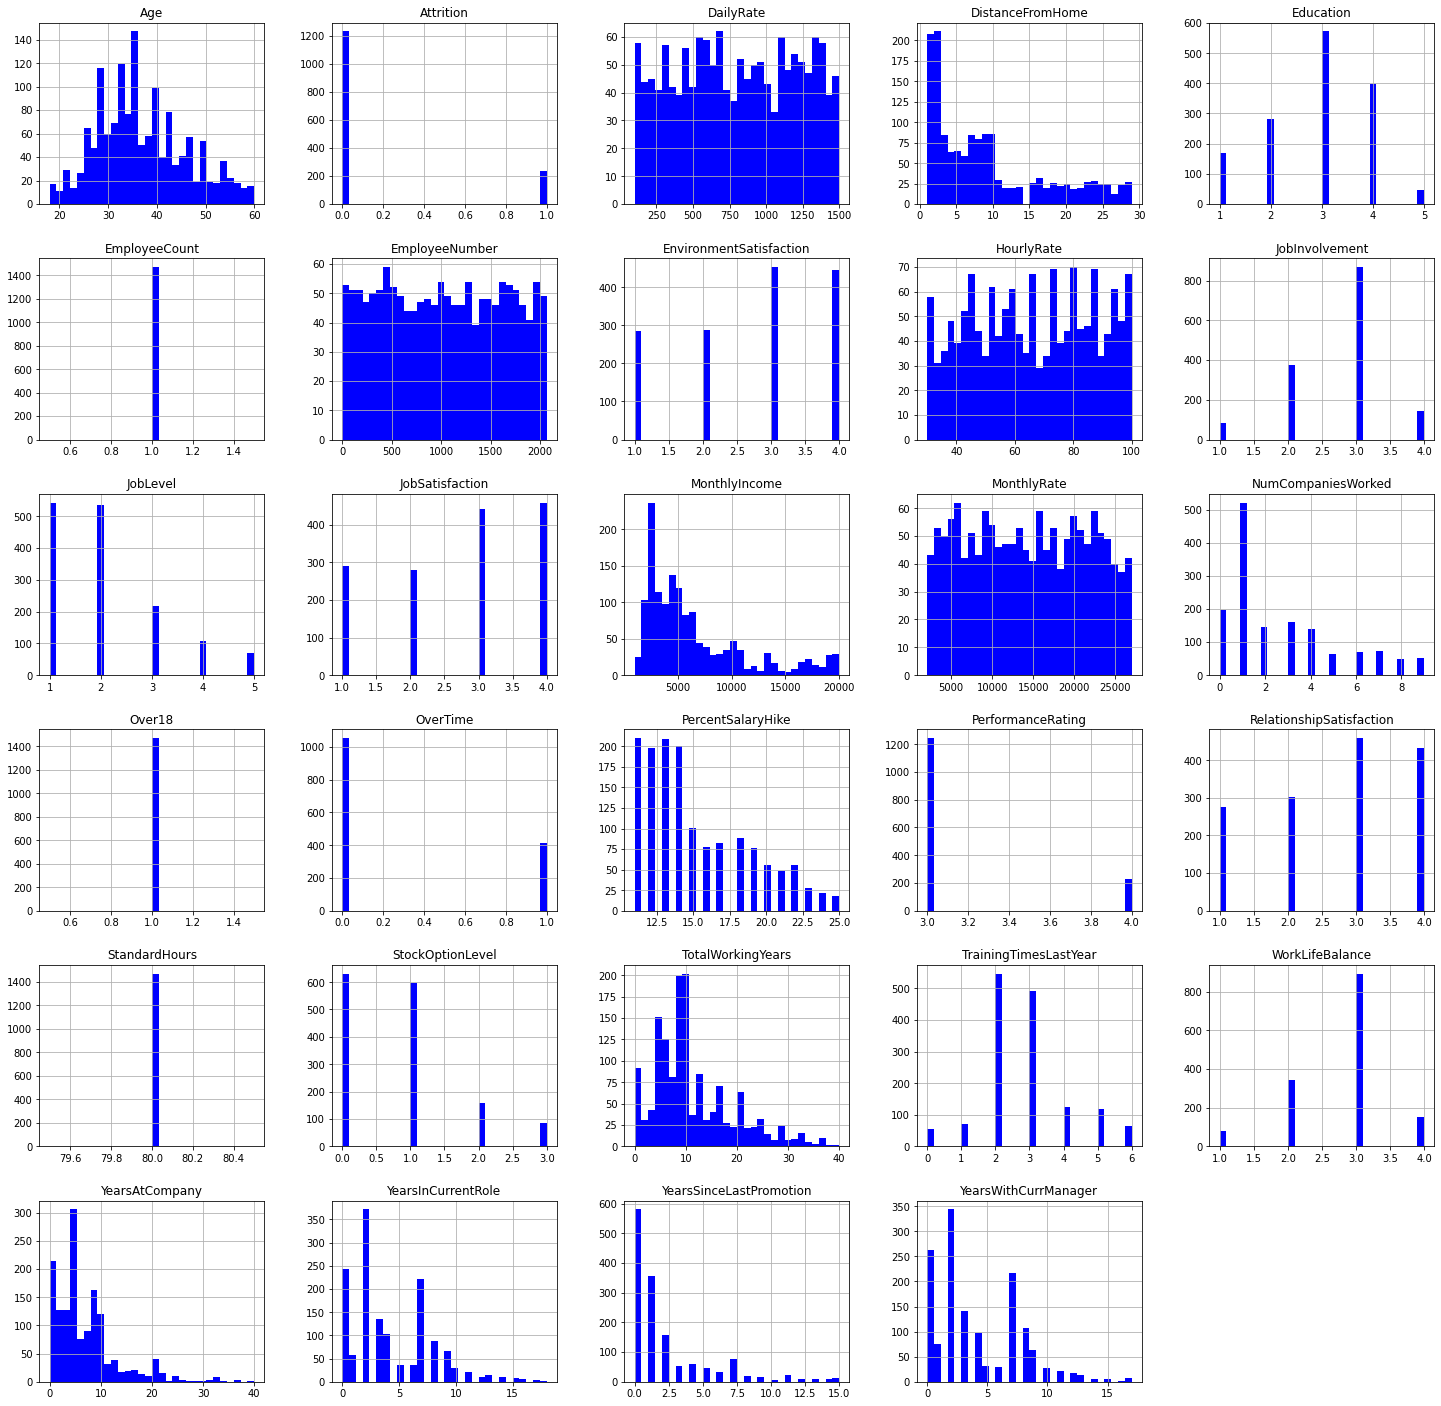

In [6]:
# Теперь построим гистограмму всех объектов вместе и проанализируем некоторые важные объекты
data.hist(bins=30, figsize=(25,25), color='b')

В наборе данных есть 4 нерелевантных столбца EmployeeCount, employeeNumber, Over18 и StandardHour. Поэтому мы должны удалить их для большей точности.

In [7]:
data.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis = 1, inplace = True)

In [8]:
left_df = data[data['Attrition'] == 1]
stayed_df = data[data['Attrition'] == 0]

In [9]:
print('всего сотрудников в компании = {}'.format(len(data)))
print('число сотрудников покинувших компанию = {}'.format(len(left_df)))
print('процент покинувших компанию = {0:.1%}'.format((len(left_df)/len(data))*100))
print('число сотрудников оставшихся в компании = {}'.format(len(stayed_df)))
print('процент оставшихся в компании = {0:.1%}'.format((len(stayed_df)/len(data))*100))

всего сотрудников в компании = 1470
число сотрудников покинувших компанию = 237
процент покинувших компанию = 1612.2%
число сотрудников оставшихся в компании = 1233
процент оставшихся в компании = 8387.8%


In [10]:
left_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
Attrition,237.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0
JobSatisfaction,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0


In [11]:
stayed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1233.0,37.561233,8.888360,18.0,31.0,36.0,43.0,60.0
Attrition,1233.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
DailyRate,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
DistanceFromHome,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Education,1233.0,2.927007,1.027002,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1233.0,2.771290,1.071132,1.0,2.0,3.0,4.0,4.0
HourlyRate,1233.0,65.952149,20.380754,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1233.0,2.770479,0.692050,1.0,2.0,3.0,3.0,4.0
JobLevel,1233.0,2.145985,1.117933,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1233.0,2.778589,1.093277,1.0,2.0,3.0,4.0,4.0


Давайте сравним показатели сотрудников, которые остались и ушли
* 'Age': средний возраст сотрудников, которые остались, выше по сравнению с теми, кто ушел.
* 'DailyRate': Ставка сотрудников, которые остались, выше
* 'DistanceFromHome': Сотрудники, которые остались, живут ближе к дому
* 'EnvironmentSatisfaction' & 'JobSatisfaction': Сотрудники, которые остались, как правило, более удовлетворены своей работой
* 'StockOptionLevel': Сотрудники, которые остались, как правило, имеют более высокий уровень опционов на акции

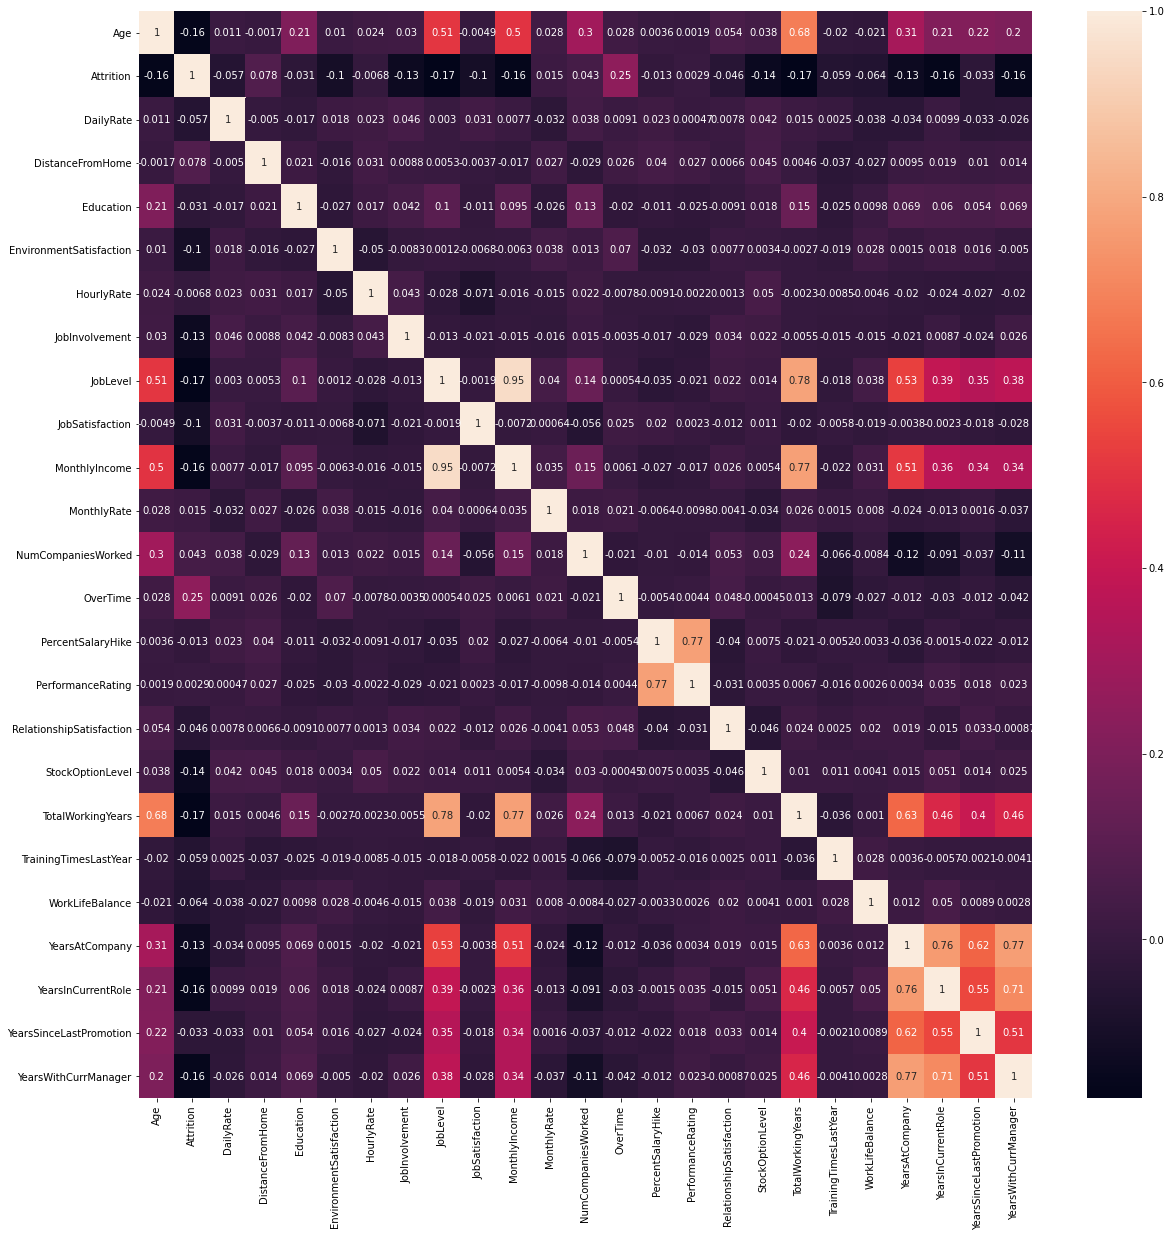

In [12]:
correlations = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True)

* Уровень занятости сильно коррелирует с общим количеством рабочих лет
* Ежемесячный доход сильно коррелирует с уровнем занятости
* Ежемесячный доход сильно коррелирует с общим рабочим временем
* Возраст сильно коррелирует с ежемесячным доходом
* Кроме того, мы видим, что сверхурочная работа оказывает сильное влияние на истощение

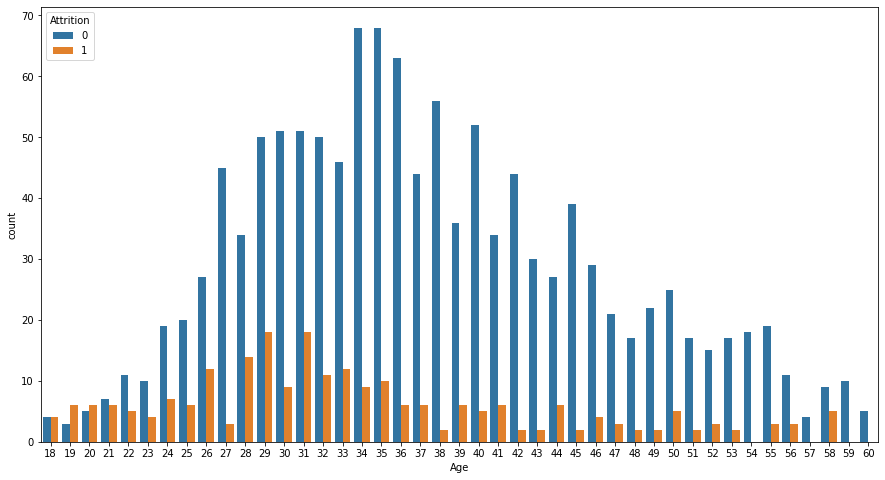

In [13]:
# Теперь давайте посмотрим, в какой возрастной группе люди больше покидает компанию.
plt.figure(figsize=(15,8))
sns.countplot(x='Age', hue= 'Attrition', data=data)


Мы видим, что возрастные группа от 28 до 31 являются самыми уязвимыми

**Исследуем подробнее**

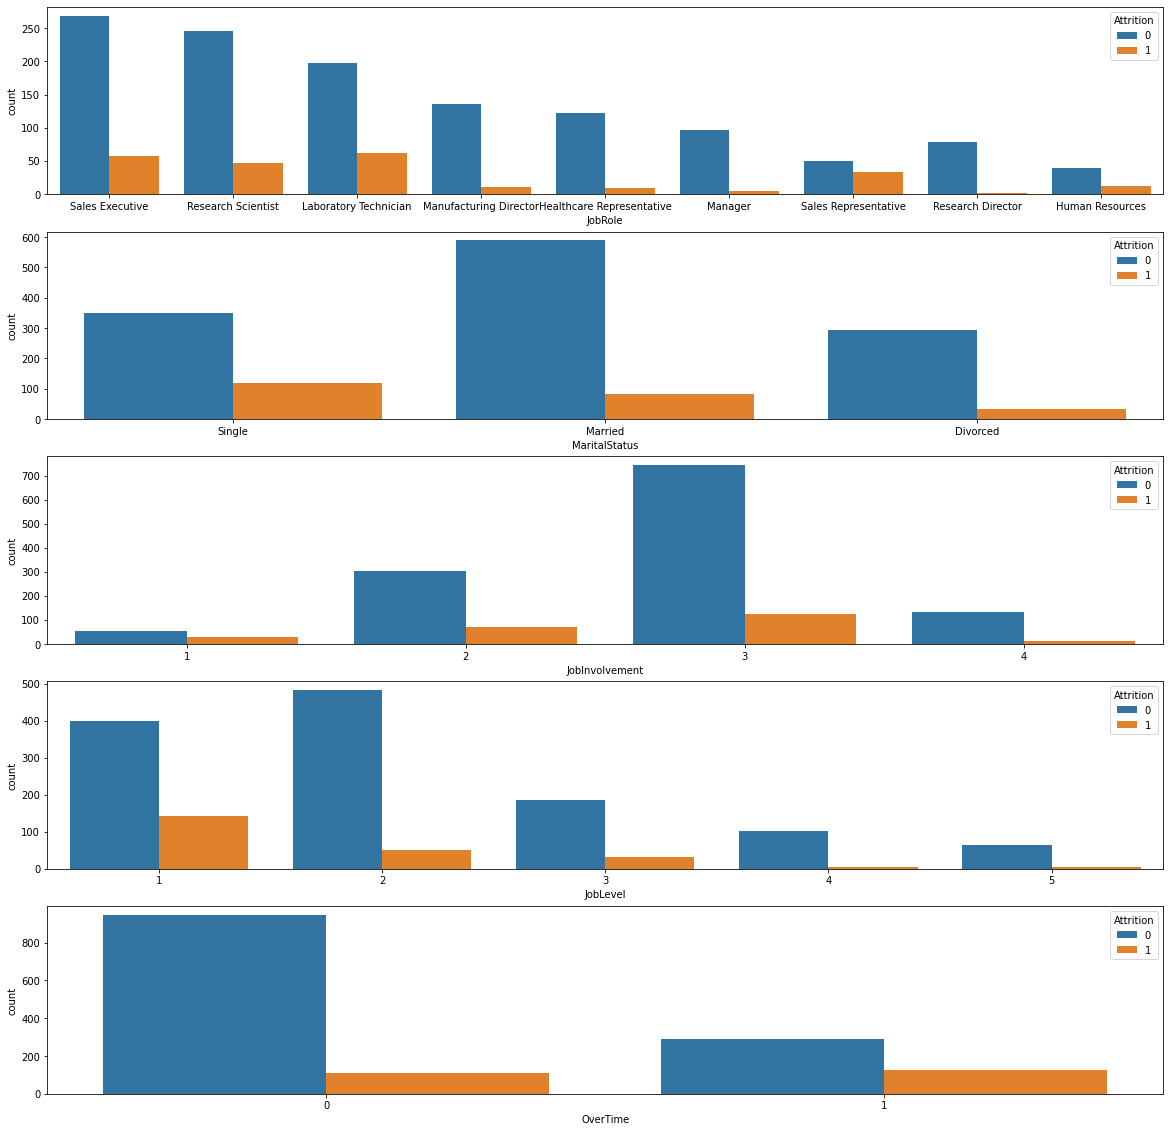

In [14]:
plt.figure(figsize=(20,20))
plt.subplot(511)
sns.countplot(x = 'JobRole', hue = 'Attrition', data=data)
plt.subplot(512)
sns.countplot(x = 'MaritalStatus',hue = 'Attrition', data=data)
plt.subplot(513)
sns.countplot(x = 'JobInvolvement',hue = 'Attrition', data=data)
plt.subplot(514)
sns.countplot(x = 'JobLevel',hue = 'Attrition', data=data)
plt.subplot(515)
sns.countplot(x = 'OverTime',hue = 'Attrition', data=data)

* Торговые представители и работники лабораторий имеют тенденцию уходить чаще по сравнению с любой другой работой 
* Одинокие сотрудники, как правило, уходят по сравнению с женатыми и разведенными
* Менее вовлеченные сотрудники, как правило, уходят из компании
* Менее опытные, как правило, покидают компанию

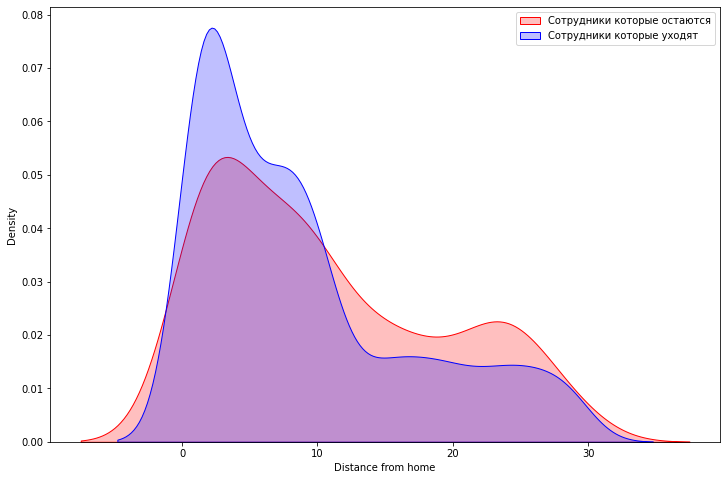

In [15]:
# для непрерывных значений
plt.figure(figsize = (12,8))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Сотрудники которые остаются', color = 'r', shade = True)
sns.kdeplot(stayed_df['DistanceFromHome'],label='Сотрудники которые уходят',color = 'b',shade=True)
plt.xlabel('Distance from home')
plt.legend()

Как мы видим, по мере увеличения расстояния сотрудники, как правило, уходят больше по сравнению с теми, кто остался.

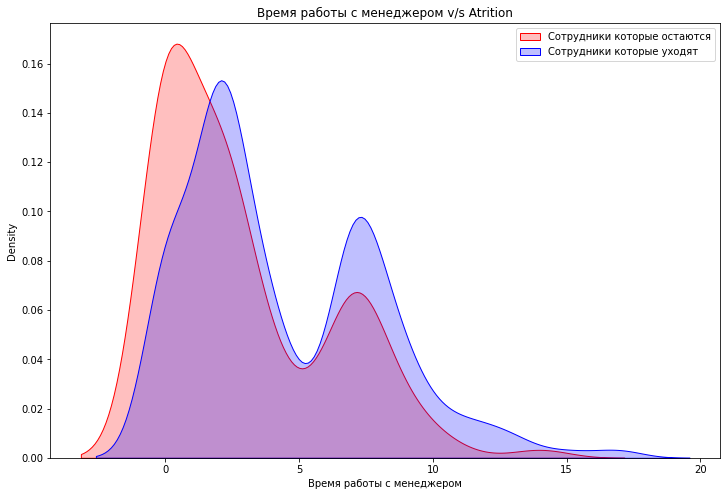

In [16]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['YearsWithCurrManager'],shade=True,color='r', label = 'Сотрудники которые остаются')
sns.kdeplot(stayed_df['YearsWithCurrManager'],shade=True,color='b', label = 'Сотрудники которые уходят')

plt.xlabel('Время работы с менеджером')
plt.title('Время работы с менеджером v/s Atrition')
plt.legend()

мы видим, что в раннее время уходят больше, чем остаются, но с течением времени сотрудники, как правило, остаются.

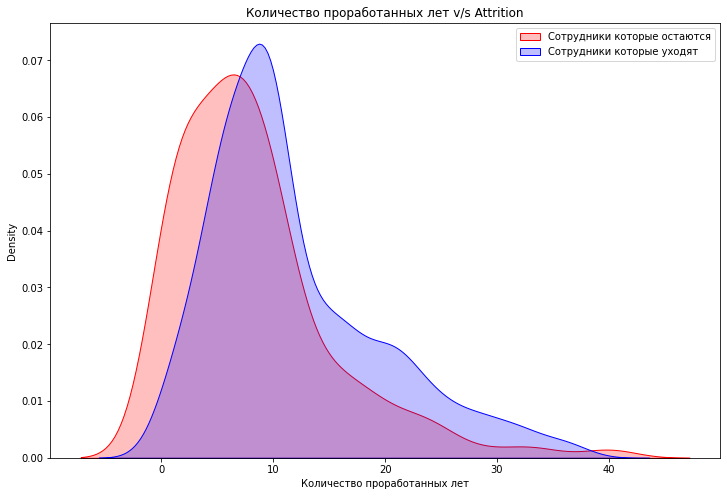

In [17]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['TotalWorkingYears'],label='Сотрудники которые остаются',shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'],label='Сотрудники которые уходят',shade = True, color = 'b')

plt.xlabel('Количество проработанных лет')
plt.title('Количество проработанных лет v/s Attrition')
plt.legend()

Интересно наблюдать тенденцию к тому, что многие сотрудники уходят от 7 до 10 лет работы

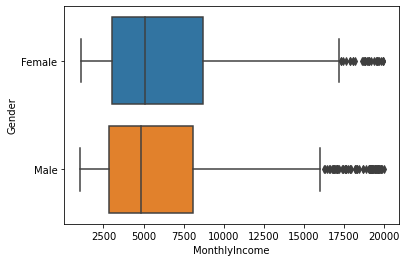

In [18]:
sns.boxplot(x='MonthlyIncome',y='Gender',data=data)

Видим, что женщины получают в среднем немного больше

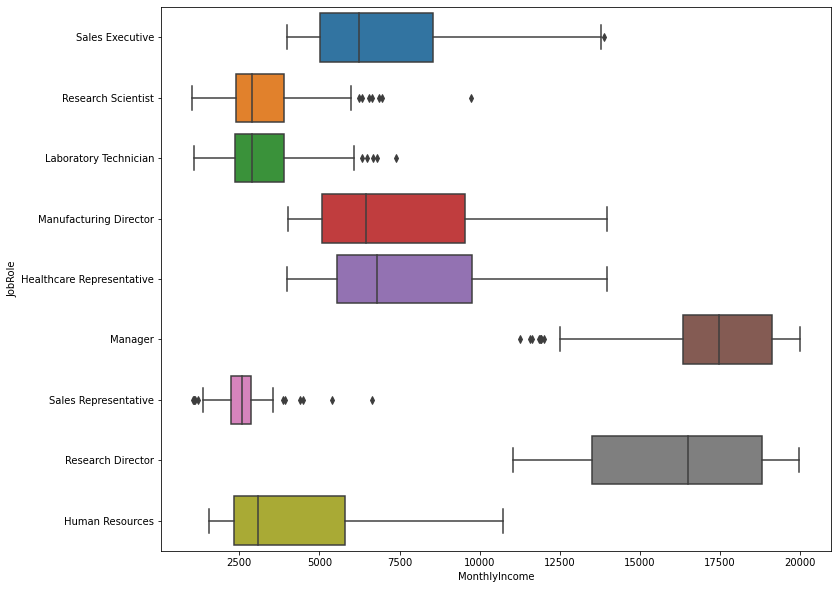

In [19]:
plt.figure(figsize=(12,10))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=data)

Нашлядное распределение дохода по профессиям, по моему мнению этот график отвечает на вопрос об уходе торговых представителей и работников лаборатории

## Предобработка данных. Формирование тестовой и тренировочной выборки

In [20]:
categorial_var = data.select_dtypes(include=['object'])
categorial_var.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [21]:
# Унитарным кодированием преобразуем значения
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(categorial_var).toarray()
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [22]:
X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
X_numeric = data.select_dtypes(include=['int64'])
X_numeric

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [24]:
X_all = pd.concat([X_cat,X_numeric],axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [25]:
# удаляем столбец с целевой переменной
X_all.drop('Attrition',axis=1,inplace=True)
X_all.shape

(1470, 50)

In [26]:
# Целевая переменная
y = data['Attrition']

In [27]:
#  Отмасштабируем значения в наших столбцах чтобы получить более точную модель
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X_all)
scaled_data

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

## Обучим и оценим классификаторы логистической регрессии

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [29]:
X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size = 0.25, random_state=43)

In [30]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
LR_pred = model_LR.predict(X_test)
print('Точность с моделью Logistic Regression: {}'.format(100*accuracy_score(y_test,LR_pred)))

Точность с моделью Logistic Regression: 85.86956521739131


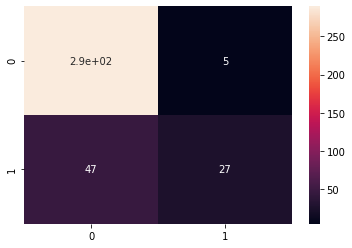

In [31]:
cm = confusion_matrix(y_test,LR_pred)
sns.heatmap(cm,annot=True)

In [32]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       294
           1       0.84      0.36      0.51        74

    accuracy                           0.86       368
   macro avg       0.85      0.67      0.71       368
weighted avg       0.86      0.86      0.84       368



## Классификатор случайный лес

In [33]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=10, criterion='entropy')

In [34]:
model_RF.fit(X_train,y_train)
RF_pred = model_RF.predict(X_test)
print('Точность с моделью Random Forest: {}'.format(100*accuracy_score(y_test,RF_pred)))

Точность с моделью Random Forest: 80.70652173913044


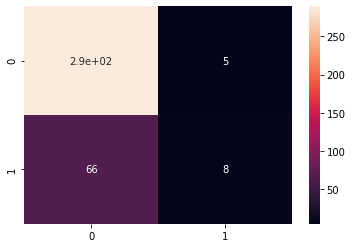

In [35]:
cm = confusion_matrix(y_test,RF_pred)
sns.heatmap(cm,annot=True)

In [36]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       294
           1       0.62      0.11      0.18        74

    accuracy                           0.81       368
   macro avg       0.71      0.55      0.54       368
weighted avg       0.77      0.81      0.75       368



**SVC**

In [37]:
from sklearn.svm import SVC

In [38]:
model=SVC(kernel='rbf', C=100, gamma=0.001)

In [39]:
model.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
SVC_pred = model_RF.predict(X_test)
print('Точность с моделью Random Forest: {}'.format(100*accuracy_score(y_test,SVC_pred)))

Точность с моделью Random Forest: 80.70652173913044


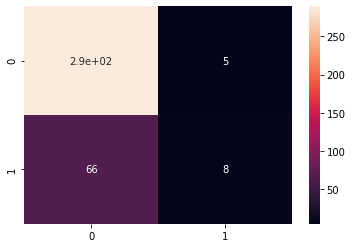

In [41]:
cm = confusion_matrix(y_test,SVC_pred)
sns.heatmap(cm,annot=True)

In [42]:
print(classification_report(y_test,SVC_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       294
           1       0.62      0.11      0.18        74

    accuracy                           0.81       368
   macro avg       0.71      0.55      0.54       368
weighted avg       0.77      0.81      0.75       368



**XGBClassifier**

In [43]:
import xgboost as xgb

In [44]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [45]:
param = {
    'eta': 0.1, 
    'max_depth': 7,  
    "gamma": 0.1,
    'objective': 'multi:softprob',
    'num_class': 4 
}

steps = 50

In [46]:
model = xgb.train(param, D_train, steps)

In [47]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
print('Точность с моделью XGboost: {}'.format(100*accuracy_score(y_test,best_preds)))

Точность с моделью XGboost: 83.15217391304348


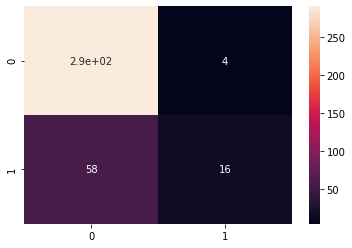

In [48]:
cm = confusion_matrix(y_test,best_preds)
sns.heatmap(cm,annot=True)

In [49]:
print(classification_report(y_test,best_preds))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       294
           1       0.80      0.22      0.34        74

    accuracy                           0.83       368
   macro avg       0.82      0.60      0.62       368
weighted avg       0.83      0.83      0.79       368



## Модель глубокого обучения

In [50]:
import tensorflow as tf

In [51]:
model_NN = tf.keras.models.Sequential()
model_NN.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(50, )))
model_NN.add(tf.keras.layers.Dense(units=100, activation='relu'))
model_NN.add(tf.keras.layers.Dense(units=100, activation='relu'))
model_NN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [52]:
model_NN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               5100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 25,401
Trainable params: 25,401
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_NN.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [54]:
scaled_df = pd.DataFrame(scaled_data,columns=X_all.columns)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [55]:
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(scaled_df,y,test_size = 0.25, random_state=43)

In [56]:
epochs_hist = model_NN.fit(X_train_new, y_train_new, epochs = 20, batch_size = 50)

Epoch 1/20
23/23 [==============================] - 1s 3ms/step - loss: 0.5658 - accuracy: 0.7081
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 0.4123 - accuracy: 0.8463
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.3487 - accuracy: 0.8604
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.8387
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8748
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8787
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.8921
Epoch 8/20
23/23 [==============================] - 0s 3ms/step - loss: 0.2567 - accuracy: 0.9096
Epoch 9/20
23/23 [==============================] - 0s 3ms/step - loss: 0.2389 - accuracy: 0.9137
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9279
Epoch 11/20
23/23 [

In [57]:
y_pred = model_NN.predict(X_test)
y_pred = (y_pred > 0.5)

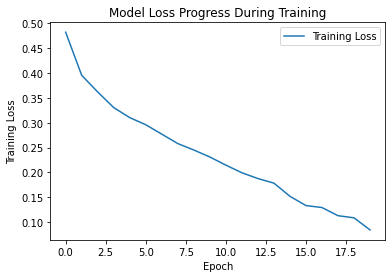

In [58]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

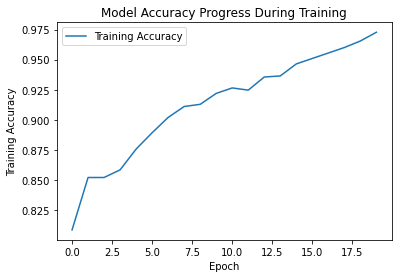

In [59]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

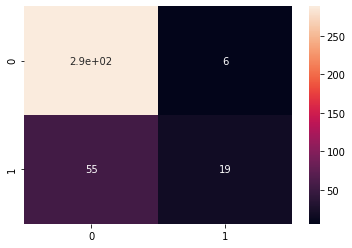

In [60]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       294
           1       0.76      0.26      0.38        74

    accuracy                           0.83       368
   macro avg       0.80      0.62      0.64       368
weighted avg       0.82      0.83      0.80       368



# Вывод
В ноутбуке я сделал несколько EDA и визуализировал данные с помощью plt и sns. Я использовал логистическую регрессию, Случайный лес, SVC, XGBoost и позже построил ANN для предсказаний. Каждый из них отличался хорошей точностью. Самые лучшие предстказания получились у логистической регресии.

Довольно часто, хорошего показателя точности(accuracy) недостаточно для оценки производительности модели. Иногда это может ввести вас в заблуждение. Модель реального мира также должна иметь хорошую точность и отзывчивость(precision, recall). Поэтому всегда полезно нарисовать матрицу и отчет о классификации, чтобы лучше понять правильность  модели.